# Predicting the Capital One Stock Price

Today we will be using a neural network to predict the price of the Capital One stock (COF) using data from 1994 up till today.

In [1]:
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For enhanced data visualization
import pandas as pd # For data manipulation
import numpy as np # For numerical operations
import tensorflow as tf # For building the neural network
import yfinance as yf  # For downloading stock data
from sklearn.preprocessing import MinMaxScaler # For feature scaling
from datetime import date # For handling date and time

In [2]:
# Get the current date
today = date.today()

# Format the date as YYYYMMDD
formatted_date = today.strftime("%Y-%m-%d")

In [3]:
df = yf.download("COF", start="1994-01-01", end=formatted_date) # Downloading the Capital One stock data from 1994 to today

/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_65748/4190973676.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("COF", start="1994-01-01", end=formatted_date) # Downloading the Capital One stock data from 1994 to today
[*********************100%***********************]  1 of 1 completed


In [4]:
df.shape

(7732, 5)

In [5]:
if isinstance(df.columns, pd.MultiIndex): # Flatten MultiIndex columns if present
    df.columns = df.columns.get_level_values(0)

In [6]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [7]:
df = df.reset_index() # Resetting the index to have a clean DataFrame

In [8]:
# Convert the 'Date' column to datetime format
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop("Date", axis=1, inplace=True)

In [9]:
df

Price,Close,High,Low,Open,Volume,Year,Month,Day
0,3.750285,3.779585,3.750285,3.750285,8343900,1994,11,16
1,3.808883,3.808883,3.720986,3.750285,4872000,1994,11,17
2,3.867482,3.896782,3.808884,3.838183,1468800,1994,11,18
3,3.779585,3.896781,3.779585,3.896781,348600,1994,11,21
4,3.603791,3.779586,3.603791,3.750286,709800,1994,11,22
...,...,...,...,...,...,...,...,...
7727,207.470001,211.710007,203.630005,211.570007,4794900,2025,8,1
7728,210.789993,211.199997,207.720001,209.050003,2174800,2025,8,4
7729,212.000000,212.990005,208.580002,211.990005,3683600,2025,8,5
7730,212.880005,213.320007,211.440002,212.309998,3186500,2025,8,6


In [10]:
# Splitting the data into training and testing sets
# Using data up to 2020 for training and data after 2020 for testing
X_train = df[df["Year"] <= 2020]
X_test = df[df["Year"] > 2020]

In [11]:
# Feature scaling
scaler = MinMaxScaler()

In [12]:
X_train.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Year', 'Month', 'Day'], dtype='object', name='Price')

In [13]:
X_train

Price,Close,High,Low,Open,Volume,Year,Month,Day
0,3.750285,3.779585,3.750285,3.750285,8343900,1994,11,16
1,3.808883,3.808883,3.720986,3.750285,4872000,1994,11,17
2,3.867482,3.896782,3.808884,3.838183,1468800,1994,11,18
3,3.779585,3.896781,3.779585,3.896781,348600,1994,11,21
4,3.603791,3.779586,3.603791,3.750286,709800,1994,11,22
...,...,...,...,...,...,...,...,...
6573,89.527855,89.638265,88.138469,89.242612,960200,2020,12,24
6574,89.757851,91.202441,89.656637,90.006280,2138400,2020,12,28
6575,88.497292,89.960281,87.844006,89.767057,1902700,2020,12,29
6576,90.061501,90.153518,88.304072,88.791735,1405200,2020,12,30


In [14]:
# Adding a 'Quarter' feature based on the 'Month' as stocks often have quarterly patterns
X_train["Quarter"] = X_train["Month"].apply(lambda x: (x - 1) // 3 + 1)
X_test["Quarter"] = X_test["Month"].apply(lambda x: (x - 1) // 3 + 1)

/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_65748/3229396594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Quarter"] = X_train["Month"].apply(lambda x: (x - 1) // 3 + 1)
/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_65748/3229396594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Quarter"] = X_test["Month"].apply(lambda x: (x - 1) // 3 + 1)


In [15]:
X_train

Price,Close,High,Low,Open,Volume,Year,Month,Day,Quarter
0,3.750285,3.779585,3.750285,3.750285,8343900,1994,11,16,4
1,3.808883,3.808883,3.720986,3.750285,4872000,1994,11,17,4
2,3.867482,3.896782,3.808884,3.838183,1468800,1994,11,18,4
3,3.779585,3.896781,3.779585,3.896781,348600,1994,11,21,4
4,3.603791,3.779586,3.603791,3.750286,709800,1994,11,22,4
...,...,...,...,...,...,...,...,...,...
6573,89.527855,89.638265,88.138469,89.242612,960200,2020,12,24,4
6574,89.757851,91.202441,89.656637,90.006280,2138400,2020,12,28,4
6575,88.497292,89.960281,87.844006,89.767057,1902700,2020,12,29,4
6576,90.061501,90.153518,88.304072,88.791735,1405200,2020,12,30,4


In [16]:
# Adding an IncreasedToday feature to indicate if the stock price increased today
X_train["IncreasedToday"] = (X_train["Close"] > X_train["Open"]).astype(int)
X_test["IncreasedToday"] = (X_test["Close"] > X_test["Open"]).astype(int)

/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_65748/182026311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["IncreasedToday"] = (X_train["Close"] > X_train["Open"]).astype(int)
/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_65748/182026311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["IncreasedToday"] = (X_test["Close"] > X_test["Open"]).astype(int)


In [17]:
X_train["IncreasedToday"].value_counts()

IncreasedToday
0    3297
1    3281
Name: count, dtype: int64

In [18]:
plt.rcParams['figure.figsize'] = [17, 8]  # Set default figure size for plots

In [19]:
sns.set(style="darkgrid") # Setting the style for seaborn plots

<Axes: ylabel='Close'>

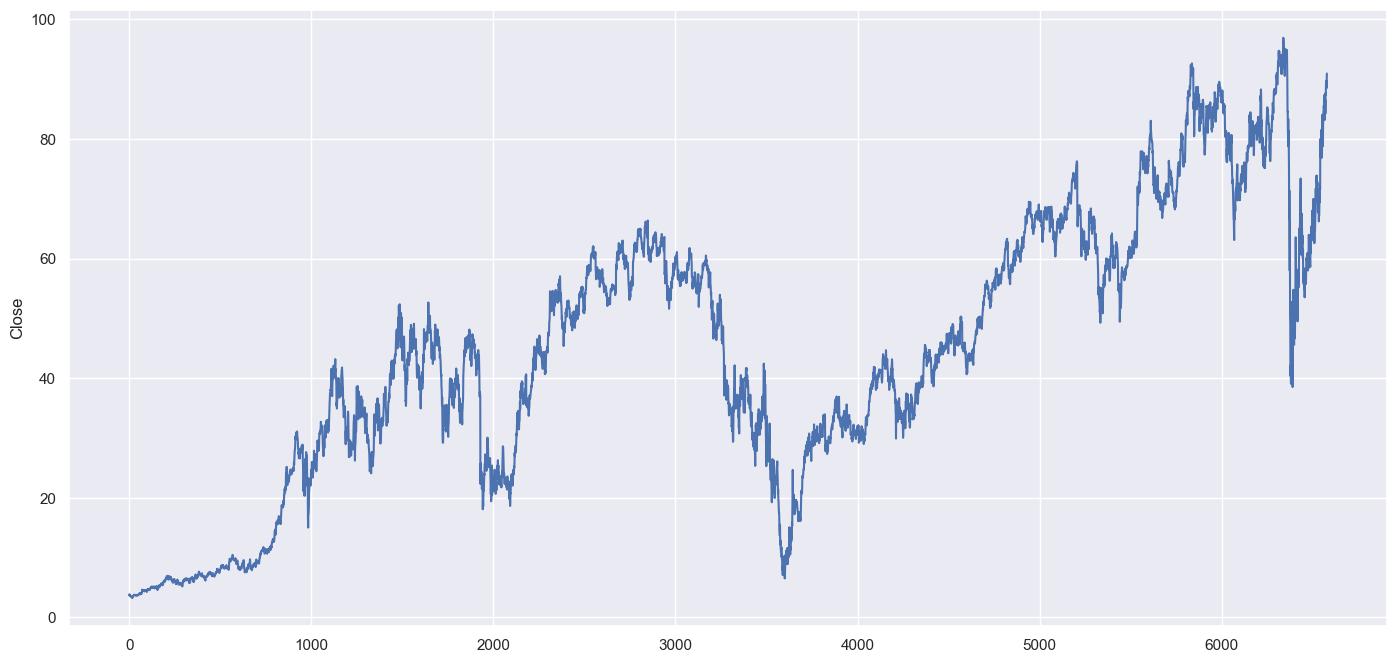

In [20]:
sns.lineplot(X_train["Close"])

<Axes: ylabel='Open'>

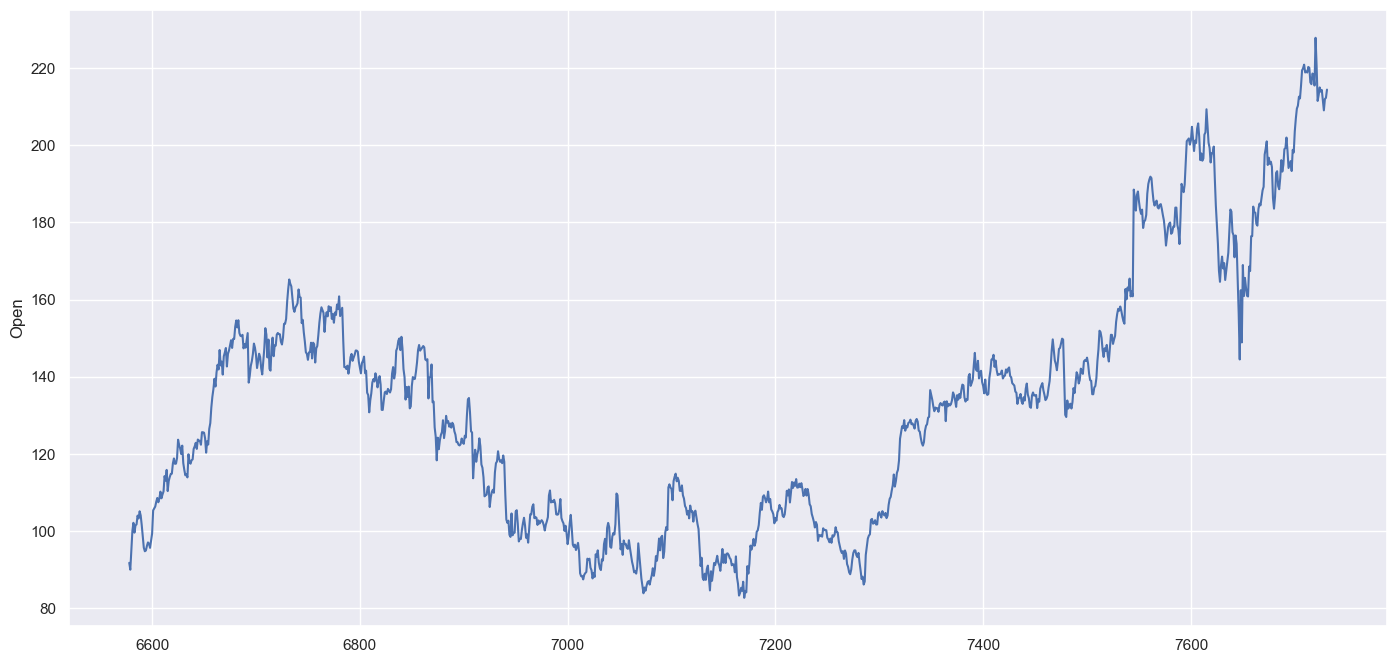

In [21]:
sns.lineplot(X_test["Open"])

In [22]:
X_train

Price,Close,High,Low,Open,Volume,Year,Month,Day,Quarter,IncreasedToday
0,3.750285,3.779585,3.750285,3.750285,8343900,1994,11,16,4,0
1,3.808883,3.808883,3.720986,3.750285,4872000,1994,11,17,4,1
2,3.867482,3.896782,3.808884,3.838183,1468800,1994,11,18,4,1
3,3.779585,3.896781,3.779585,3.896781,348600,1994,11,21,4,0
4,3.603791,3.779586,3.603791,3.750286,709800,1994,11,22,4,0
...,...,...,...,...,...,...,...,...,...,...
6573,89.527855,89.638265,88.138469,89.242612,960200,2020,12,24,4,1
6574,89.757851,91.202441,89.656637,90.006280,2138400,2020,12,28,4,0
6575,88.497292,89.960281,87.844006,89.767057,1902700,2020,12,29,4,0
6576,90.061501,90.153518,88.304072,88.791735,1405200,2020,12,30,4,1


In [23]:
def add_stock_features(df):
    df = df.copy()
    
    # 1️⃣ Price history features
    df["Prev_Close"] = df["Close"].shift(1)
    df["Price_Change_Pct"] = (df["Close"] - df["Open"]) / df["Open"]
    df["High_Low_Range"] = df["High"] - df["Low"]
    df["Gap"] = df["Open"] - df["Prev_Close"]
    
    # 2️⃣ Rolling & lag features
    df["MA_5"] = df["Close"].rolling(window=5).mean()
    df["MA_20"] = df["Close"].rolling(window=20).mean()
    df["Rolling_STD_5"] = df["Close"].rolling(window=5).std()
    df["Rolling_STD_20"] = df["Close"].rolling(window=20).std()
    
    # Lagged prices
    df["Close_t-1"] = df["Close"].shift(1)
    df["Close_t-2"] = df["Close"].shift(2)
    
    # Momentum
    df["Momentum_5"] = df["Close"] - df["Close"].shift(5)
    df["Momentum_10"] = df["Close"] - df["Close"].shift(10)

    df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
    df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

    df["Day_sin"] = np.sin(2 * np.pi * df["Day"] / 31)
    df["Day_cos"] = np.cos(2 * np.pi * df["Day"] / 31)


    df["Quarter_sin"] = np.sin(2 * np.pi * df["Quarter"] / 4)
    df["Quarter_cos"] = np.cos(2 * np.pi * df["Quarter"] / 4)
    
    return df

In [24]:
X_train = add_stock_features(X_train)
X_test = add_stock_features(X_test)

In [25]:
X_train.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Year', 'Month', 'Day',
       'Quarter', 'IncreasedToday', 'Prev_Close', 'Price_Change_Pct',
       'High_Low_Range', 'Gap', 'MA_5', 'MA_20', 'Rolling_STD_5',
       'Rolling_STD_20', 'Close_t-1', 'Close_t-2', 'Momentum_5', 'Momentum_10',
       'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Quarter_sin',
       'Quarter_cos'],
      dtype='object', name='Price')

In [26]:
numeric_cols = ['High', 'Low', 'Open', 'Volume',
                'Prev_Close', 'Price_Change_Pct', 'High_Low_Range',
                'Gap', 'MA_5', 'MA_20', 'Rolling_STD_5', 'Rolling_STD_20',
                'Close_t-1', 'Close_t-2',
                'Momentum_5', 'Momentum_10', 'IncreasedToday',
                'Month_sin', 'Month_cos',
                'Day_sin', 'Day_cos',
                'Quarter_sin', 'Quarter_cos' 
                ]

In [27]:
# Fitting the scaler on the training data
scaler.fit(X_train[numeric_cols])

MinMaxScaler()

In [28]:
target_scaler = MinMaxScaler()
target_scaler.fit(X_train[["Close"]])

MinMaxScaler()

In [29]:
# Transforming targets
X_train["Close"] = target_scaler.transform(X_train[["Close"]])
X_test["Close"] = target_scaler.transform(X_test[["Close"]])

In [30]:
# Transforming both training and testing data
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [31]:
X_train = X_train.dropna().reset_index(drop=True)
X_test = X_test.dropna().reset_index(drop=True)

In [32]:
X_train[numeric_cols].describe()

Price,High,Low,Open,Volume,Prev_Close,Price_Change_Pct,High_Low_Range,Gap,MA_5,MA_20,...,Close_t-2,Momentum_5,Momentum_10,IncreasedToday,Month_sin,Month_cos,Day_sin,Day_cos,Quarter_sin,Quarter_cos
count,6559.000000,6559.000000,6.559000e+03,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,...,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000
mean,0.445302,0.443389,4.440712e-01,0.031011,0.442833,0.404087,0.105939,0.639349,0.451480,0.457429,...,0.442692,0.605781,0.695480,0.499619,0.495638,0.496226,0.503131,0.485093,0.495807,0.501677
std,0.237787,0.240579,2.393260e-01,0.035684,0.238239,0.050406,0.076484,0.032737,0.243037,0.246948,...,0.238227,0.056651,0.055598,0.500038,0.353297,0.353816,0.357505,0.350702,0.351907,0.355217
min,0.000621,0.000953,2.915299e-08,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.289518,0.283765,2.863176e-01,0.013004,0.285758,0.382505,0.059659,0.631014,0.291877,0.299107,...,0.285721,0.580717,0.670547,0.000000,0.066987,0.066987,0.137138,0.118359,0.000000,0.000000
50%,0.442635,0.440892,4.410894e-01,0.021792,0.439627,0.402844,0.091074,0.638769,0.449166,0.454165,...,0.439340,0.607539,0.697431,0.000000,0.500000,0.500000,0.500000,0.473324,0.500000,0.500000
75%,0.616924,0.619670,6.183645e-01,0.035991,0.616553,0.424259,0.135640,0.648641,0.629207,0.637805,...,0.616317,0.634303,0.724667,1.000000,0.750000,0.750000,0.862862,0.844083,0.500000,1.000000
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(numeric_cols),)),  
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1),  
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

2025-08-08 12:34:07.772033: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-08-08 12:34:07.772064: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-08-08 12:34:07.772068: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-08-08 12:34:07.772086: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-08 12:34:07.772096: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras',      # filename to save the model
    monitor='val_loss',   # what metric to watch (usually validation loss)
    save_best_only=True,  # save only if model improves
    mode='min',           # because lower loss is better
    verbose=1             # prints a message when saving
)


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    # which metric to watch (validation loss is common)
    patience=20,            # number of epochs to wait before stopping if no improvement
    mode='min',            # because lower loss is better
    restore_best_weights=True,  # put back the best weights after stopping
    verbose=1
)


In [36]:
model.fit(X_train[numeric_cols], X_train["Close"], 
          validation_data=(X_test[numeric_cols], X_test["Close"]),
          epochs=2000, batch_size=128, verbose=1, callbacks=[checkpoint, early_stopping])  # Training the model with validation on test set

Epoch 1/2000


2025-08-08 12:34:08.083699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1226 - mae: 0.2669
Epoch 1: val_loss improved from inf to 0.00661, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1213 - mae: 0.2648 - val_loss: 0.0066 - val_mae: 0.0730
Epoch 2/2000
49/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7509e-04 - mae: 0.0184
Epoch 2: val_loss improved from 0.00661 to 0.00099, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5856e-04 - mae: 0.0181 - val_loss: 9.8816e-04 - val_mae: 0.0225
Epoch 3/2000
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4233e-04 - mae: 0.0086
Epoch 3: val_loss did not improve from 0.00099
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4187e-04 - mae: 0.0086 - val_loss: 0.0010 - val_mae: 0.0220
Epoch 4/2000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0874e-04 - mae: 0.0072
Epoch 4: val_loss improved from 0.00099 to 0.00086, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0

In [37]:
from tensorflow.keras.models import load_model

model = load_model('best_model.keras') # Load the best model saved during training

In [38]:
model.evaluate(X_train[numeric_cols], X_train["Close"], verbose=1)  # Evaluate the model on the train set

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3224e-05 - mae: 0.0046


[2.8127722544013523e-05, 0.004171075765043497]

In [39]:
model.evaluate(X_test[numeric_cols], X_test["Close"], verbose=1)  # Evaluate the model on the test set

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8225e-04 - mae: 0.0105


[0.00022531636932399124, 0.01108888816088438]

# Time to Predict

In [40]:
today = X_test[numeric_cols].iloc[-1:]  # Last row for today's prediction

# Predict price for today
predicted_price = model.predict(today)  
predicted_price = predicted_price.reshape(-1, 1)  # <- store the reshaped result
predicted_price = target_scaler.inverse_transform(predicted_price)  # Inverse transform

# Actual price for today (scaled value)
actual_price = X_test["Close"].iloc[-1]
actual_price = np.array([[actual_price]])  # make it 2D
actual_price = target_scaler.inverse_transform(actual_price)  # Inverse transform

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


In [41]:
difference = abs(predicted_price - actual_price)[[0]]  # Calculate the difference

In [42]:
print(f"Actual: ${actual_price[0][0]}\nPredicted: ${predicted_price[0][0]}\nDifference: ${difference[0][0]}")  # Print actual and predicted prices

Actual: $207.2899932861328
Predicted: $210.5940704345703
Difference: $3.3040771484375
